# Dang Thanh Vu - 197796

In [1]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import roc_curve, auc

def random_MixtureGaussian(N, P, m, S, cl):
    d = m.shape[1]
    c = m.shape[0]
    z = np.random.choice(np.arange(0,c), N, p=P)
    X = np.ones([1,d])
    for i in range(0,c):
        n = np.sum(z == np.array([i]*N))
        x = np.random.multivariate_normal(m[i], S[i], n)
        X = np.concatenate([X, x])
    X = X[1:]
    Y = cl*np.array(N*[1])
    return X, Y

def t_test(S1, S2, p_value):
    n1 = S1.shape[0]
    n2 = S2.shape[0]
    m1 = np.mean(S1)
    m2 = np.mean(S2)
    var1 = n1*np.var(S1)/(n1-1)
    var2 = n2*np.var(S2)/(n2-1)
    t_value = (m1 - m2)/(np.sqrt(var1/n1 + var2/n2))
    df = n1 + n2 - 2
    p = 1 - stats.t.cdf(t_value, df=df)
    return 2*p, 2*p < p_value

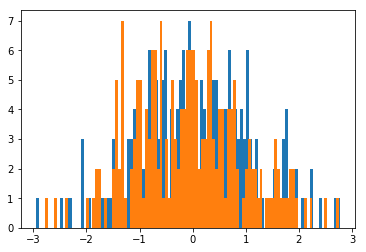

In [2]:
m1 = np.array([[0]])
m2 = np.array([[0]])
S = np.array([[[1]]])
N = 200
P = np.array([1])
S1, Y1 = random_MixtureGaussian(N, P, m1, S, -1)
S2, Y2 = random_MixtureGaussian(N, P, m2, S, 1)
plt.hist(S1[:, 0], bins=100)
plt.hist(S2[:, 0], bins=100)
plt.show()

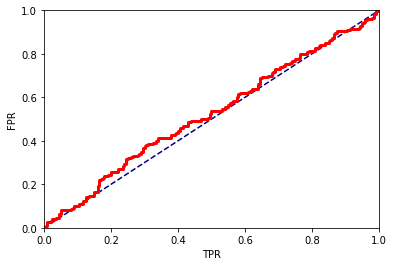

area under ROC:  0.5246250000000001


In [3]:
cl = np.concatenate([Y1, Y2])
scores = np.concatenate([S1[:, 0], S2[:, 0]])
fpr, tpr, _ = roc_curve(cl, scores, pos_label=1)
roc_auc = auc(tpr, fpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.plot(tpr, fpr, 'r-', lw=3)
plt.xlabel('TPR')
plt.ylabel('FPR')
plt.show()
print("area under ROC: ", roc_auc)

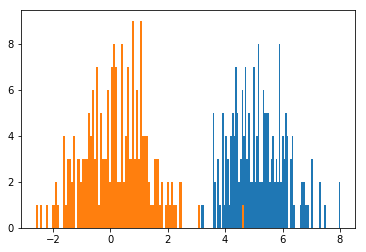

In [4]:
m1 = np.array([[5]])
m2 = np.array([[0]])
S = np.array([[[1]]])
N = 200
P = np.array([1])
S1, Y1 = random_MixtureGaussian(N, P, m1, S, -1)
S2, Y2 = random_MixtureGaussian(N, P, m2, S, 1)
plt.hist(S1[:, 0], bins=100)
plt.hist(S2[:, 0], bins=100)
plt.show()

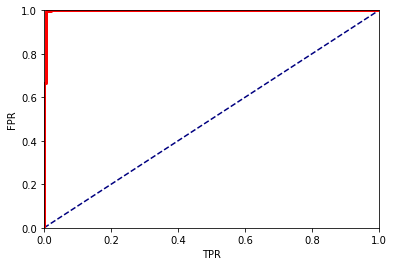

area under ROC:  0.99825


In [5]:
cl = np.concatenate([Y1, Y2])
scores = np.concatenate([S1[:, 0], S2[:, 0]])
fpr, tpr, _ = roc_curve(cl, scores, pos_label=1)
roc_auc = auc(tpr, fpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.plot(tpr, fpr, 'r-', lw=3)
plt.xlabel('TPR')
plt.ylabel('FPR')
plt.show()
print("area under ROC: ", roc_auc)